In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

df = pd.read_csv("processed_bioactivity_data.csv")

X = df.drop(columns=['bioactivity'])
y = df['pIC50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LazyRegressor()

models = reg.fit(X_train, X_test, y_train, y_test)

print(models)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 42/42 [00:21<00:00,  1.94it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1366
[LightGBM] [Info] Number of data points in the train set: 3392, number of used features: 20
[LightGBM] [Info] Start training from score 6.377780
(Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: [], Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: [])


Data Shape:  (4241, 10)
Shape after removing low-variance features:  (4241, 4)


100%|██████████| 42/42 [00:14<00:00,  2.98it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 3392, number of used features: 4
[LightGBM] [Info] Start training from score 6.377780
Train Results:
                                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.58       0.58  1.15        0.55
RandomForestRegressor                        0.57       0.57  1.16        1.47
BaggingRegressor                             0.54       0.54  1.20        0.19
XGBRegressor                                 0.53       0.53  1.21        0.99
LGBMRegressor                                0.50       0.50  1.26        0.09
HistGradientBoostingRegressor                0.50       0.50  1.26        0.27
KNeighborsReg

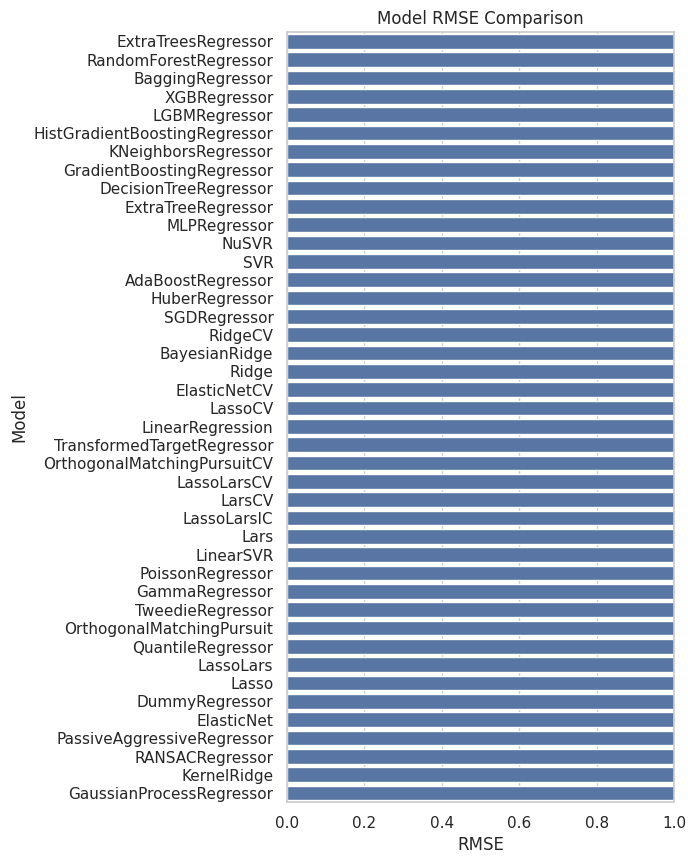

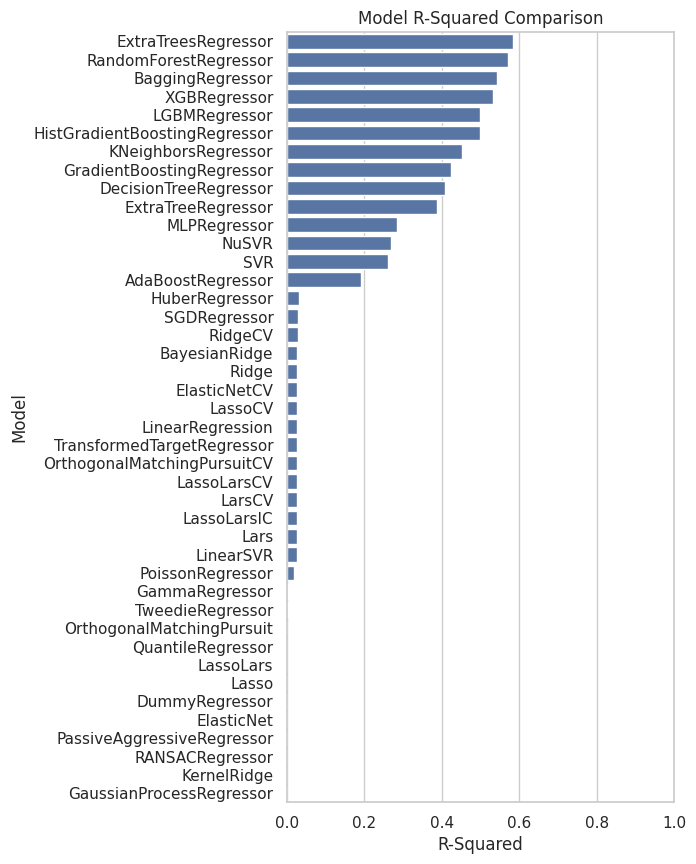

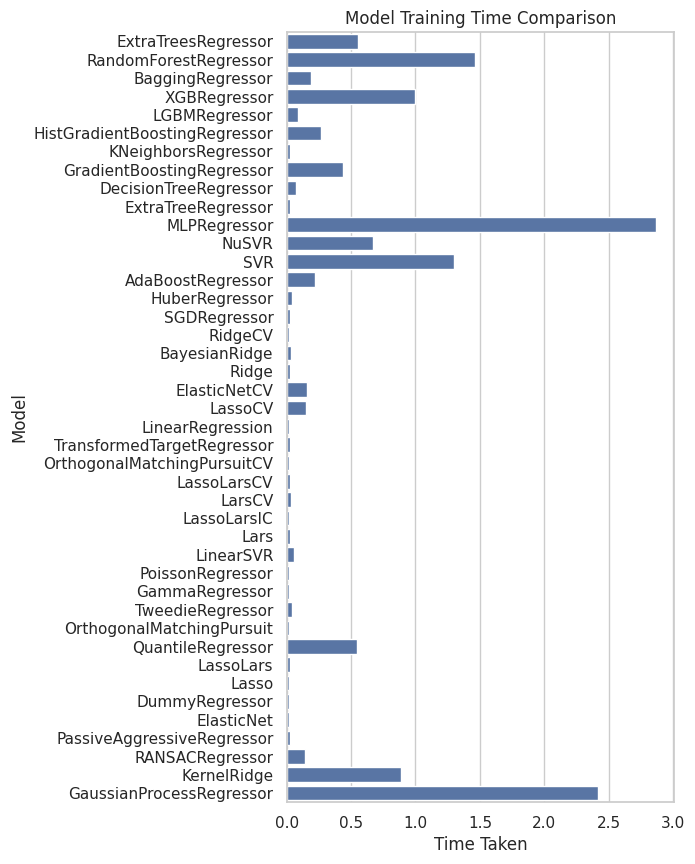

Best model by RMSE: ExtraTreesRegressor


In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv('processed_bioactivity_data.csv')

X = df.drop('pIC50', axis=1)
Y = df.pIC50

#checking the data shape
print("Data Shape: ", X.shape)

#Select only numerical features for VarianceThreshold
numerical_features = X.select_dtypes(include=['number']).columns
X_numerical = X[numerical_features]

#Removing low variance features using only numerical features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))  #Features with variance below this threshold will be removed
X_numerical = selection.fit_transform(X_numerical)

#Update X with selected features
X = X[numerical_features]
X = X[X.columns[selection.get_support(indices=True)]]


# Check data shape after feature selection
print("Shape after removing low-variance features: ", X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#comparing models using LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train_results, test_results = clf.fit(X_train, X_test, Y_train, Y_test)

print("Train Results:\n", train_results)
print("Test Results:\n", test_results)

#Data visualization of the model performance (RMSE)
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train_results.index, x="RMSE", data=train_results)
ax.set(xlim=(0, 1))
plt.title("Model RMSE Comparison")
plt.show()

#Data visualization of R-Squared
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train_results.index, x="R-Squared", data=train_results)
ax.set(xlim=(0, 1))
plt.title("Model R-Squared Comparison")
plt.show()

#Data visualization of Time Taken for Model Training
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train_results.index, x="Time Taken", data=train_results)
plt.title("Model Training Time Comparison")
plt.show()

#Select the best model based on your preferred metric (e.g., RMSE or R-Squared)
best_model_name = train_results['RMSE'].idxmin()
print(f"Best model by RMSE: {best_model_name}")

best_model = clf.models[best_model_name]